# Loss Profile

Loss profile using leaky modes of hollow core slab waveguide.  Found these values by comparing to N1 Bragg fiber.  It seems like these values make the guided modes irrelevant for propagation, so we can hopefully see the radiation fields importance more clearly than in the toy example I had been doing.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
%matplotlib widget

In [3]:
A = SlabExact(scale=8e-5, ts=[5e-5, 1e-5, 8e-5, 1e-5, 5e-5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 600, 300, 500],
              symmetric=True, wl=6.907e-6)

In [4]:
# Constant parameters
scale = 8e-5
ts = [5e-5, 1e-5, 8e-5, 1e-5, 5e-5]
ns = [1, 1.44, 1, 1.44, 1]
no_xs = True
symmetric = True

In [5]:
# Formula for loss spikes from article
ms = np.arange(1, 5,1)

n1 = A.ns[0]  # Inner (core) index (same as outermost)
n2 = A.ns[1]  # Cladding index
d = A.Ts[1]  # Thickness of glass 

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls *= A.scale
Ls

array([2.07229342e-05, 1.03614671e-05, 6.90764472e-06, 5.18073354e-06])

In [28]:
n = 400
wls = np.linspace(4.2e-6, 7.1e-6, n)
field_type='TE'


In [55]:
betas1 = np.zeros_like(wls, dtype=complex)

for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = SlabExact(scale=scale, ts=ts, ns=ns, no_xs=no_xs, symmetric=symmetric, wl=wl)

    k_low = A.K_low
    guess = np.array(.9999 * k_low)
    flag = True
    reduce = 0
    max_reduce = 10

    while flag:
        try:
            if reduce >= max_reduce:
                print("Max reductions reached, setting beta to nan.")
                beta = np.nan
                break
                
            x0 = np.array(guess)
            beta = newton(A.determinant, x0, args=(field_type, 'leaky'), tol = 1e-17)
            
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                scale_flag = True
                raise RuntimeError
                
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                guess = beta.conjugate()
                scale_flag = False
                raise RuntimeError
                
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, field_type, 'leaky')), '\n\n' )
                scale_flag = True
                flag=False
                
        except RuntimeError:
            guess *= .99999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/401: wavelength: 4.2e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (119.64417857646568-0.0006001336403422868j) . Residual of determinant:  2.1220424951326455e-11 


     --------------------  2/401: wavelength: 4.207268170426065e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (119.43676906637457-0.0004914593744203061j) . Residual of determinant:  1.3288724854406368e-11 


     --------------------  3/401: wavelength: 4.21453634085213e-06  --------------------     

scaling guess: 1
Scaled beta:  (119.23018073067645-0.00041077508630762467j) . Residual of determinant:  2.367944295409091e-11 


     --------------------  4/401: wavelength: 4.221804511278195e-06  --------------------     

scaling guess: 1
Scaled beta:  (119.02438220891268-0.00034924933322376216j) . Residual of

Positive imaginary part, retrying.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (113.54376467382049-5.380026763147313e-05j) . Residual of determinant:  1.458467008690072e-10 


     --------------------  33/401: wavelength: 4.432581453634085e-06  --------------------     

scaling guess: 1
Scaled beta:  (113.35739871038224-5.2548524309238406e-05j) . Residual of determinant:  4.614353781607595e-11 


     --------------------  34/401: wavelength: 4.43984962406015e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (113.17164373375111-5.140934998059107e-05j) . Residual of determinant:  6.05858675894926e-11 


     --------------------  35/401: wavelength: 4.447117794486215e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (112.986496646646-5.037383040630169e-05j) . Residual of determinant:  6.804702703859438e-11 


     --------------------  

scaling guess: 1
scaling guess: 2
scaling guess: 3
Positive imaginary part, retrying.
scaling guess: 4
Scaled beta:  (107.53265013167878-4.8932860762972e-05j) . Residual of determinant:  1.5757382088167647e-10 


     --------------------  67/401: wavelength: 4.6796992481203e-06  --------------------     

Scaled beta:  (107.3654562733198-4.969554403625631e-05j) . Residual of determinant:  6.522783141175184e-11 


     --------------------  68/401: wavelength: 4.686967418546365e-06  --------------------     

scaling guess: 1
Scaled beta:  (107.19878008404534-5.0518393084949925e-05j) . Residual of determinant:  1.7473943974270947e-10 


     --------------------  69/401: wavelength: 4.694235588972431e-06  --------------------     

Scaled beta:  (107.03261911405758-5.140412359977221e-05j) . Residual of determinant:  6.155197632236404e-10 


     --------------------  70/401: wavelength: 4.7015037593984955e-06  --------------------     

scaling guess: 1
Scaled beta:  (106.8669709268504

Scaled beta:  (102.27566110553269-0.00014427972125307891j) . Residual of determinant:  7.282658023133337e-11 


     --------------------  100/401: wavelength: 4.9195488721804505e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (102.12431018534289-0.00015261087912922045j) . Residual of determinant:  2.646976690559291e-11 


     --------------------  101/401: wavelength: 4.926817042606516e-06  --------------------     

Scaled beta:  (101.97339997310095-0.00016174192048949642j) . Residual of determinant:  5.3113538587093125e-11 


     --------------------  102/401: wavelength: 4.934085213032581e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (101.82292801057727-0.00017177439437716151j) . Residual of determinant:  2.4873868003193244e-11 


     --------------------  103/401: wavelength: 4.941353383458646e-06  --------------------     

Scaled beta:  (101.67289179148703-0.0001828263636983053j) . Residual of determinant:  7.2

scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
Max reductions reached, setting beta to nan.
     --------------------  133/401: wavelength: 5.159398496240601e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
Max reductions reached, setting beta to nan.
     --------------------  134/401: wavelength: 5.166666666666667e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
Max reductions reached, setting beta to nan.
     --------------------  135/401: wavelength: 5.173934837092731e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling

scaling guess: 1
scaling guess: 2
Scaled beta:  (93.55279057325785-0.0003273881959157177j) . Residual of determinant:  2.3283857559840278e-11 


     --------------------  163/401: wavelength: 5.377443609022556e-06  --------------------     

Scaled beta:  (93.4260520632249-0.00030920693810111347j) . Residual of determinant:  2.6170254200044955e-11 


     --------------------  164/401: wavelength: 5.384711779448622e-06  --------------------     

Scaled beta:  (93.2996645645276-0.0002927543563373535j) . Residual of determinant:  1.557365158557041e-12 


     --------------------  165/401: wavelength: 5.391979949874686e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Positive imaginary part, retrying.
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (93.17362577004774-0.0002778189604550389j) . Residual of determinant:  4.731464637743412e-11 


     --------------------  166/401: wavelength: 5.399248120300752e-06  --------------------   

scaling guess: 1
Scaled beta:  (89.54593532378834-0.00011319979441874704j) . Residual of determinant:  9.223043052231436e-11 


     --------------------  196/401: wavelength: 5.617293233082707e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Positive imaginary part, retrying.
scaling guess: 4
Scaled beta:  (89.42988563967782-0.00011150039117247386j) . Residual of determinant:  1.7141222336399986e-11 


     --------------------  197/401: wavelength: 5.624561403508771e-06  --------------------     

scaling guess: 1
Scaled beta:  (89.31413640680294-0.00010989977336032597j) . Residual of determinant:  3.152856100106616e-11 


     --------------------  198/401: wavelength: 5.631829573934837e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Positive imaginary part, retrying.
scaling guess: 4
Scaled beta:  (89.19868641680763-0.00010839265199478778j) . Residual of determinant:  5.4816506915775104e-11 


     ---------------

Scaled beta:  (85.97565203905378-9.153003555515012e-05j) . Residual of determinant:  1.1674851915431425e-10 


     --------------------  228/401: wavelength: 5.849874686716792e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (85.86865437977336-9.161081423740429e-05j) . Residual of determinant:  1.517143883111504e-10 


     --------------------  229/401: wavelength: 5.8571428571428565e-06  --------------------     

scaling guess: 1
Positive imaginary part, retrying.
scaling guess: 2
Scaled beta:  (85.76192202303481-9.172731595893498e-05j) . Residual of determinant:  2.2578861224829766e-12 


     --------------------  230/401: wavelength: 5.864411027568922e-06  --------------------     

scaling guess: 1
scaling guess: 2
Positive imaginary part, retrying.
scaling guess: 3
scaling guess: 4
Scaled beta:  (85.65545396834894-9.187932574183218e-05j) . Residual of determinant:  7.312846006738945e-11 


     --------------------  231/401: wav

scaling guess: 1
scaling guess: 2
Positive imaginary part, retrying.
scaling guess: 3
Scaled beta:  (83.07682369038805-0.0001076763233425601j) . Residual of determinant:  7.299279483744895e-12 


     --------------------  256/401: wavelength: 6.053383458646616e-06  --------------------     

scaling guess: 1
Positive imaginary part, retrying.
scaling guess: 2
scaling guess: 3
Scaled beta:  (82.9768919851577-0.00010885008525503464j) . Residual of determinant:  6.228771254825816e-11 


     --------------------  257/401: wavelength: 6.060651629072681e-06  --------------------     

scaling guess: 1
Positive imaginary part, retrying.
scaling guess: 2
scaling guess: 3
Scaled beta:  (82.87719933330835-0.0001100739862758765j) . Residual of determinant:  2.7076931089501182e-11 


     --------------------  258/401: wavelength: 6.067919799498747e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (82.77774485874471-0.00011134944579468416j) . Resid

Positive imaginary part, retrying.
scaling guess: 2
scaling guess: 3
Scaled beta:  (80.27274198702439-0.00016990473190602712j) . Residual of determinant:  2.8278148490908615e-11 


     --------------------  285/401: wavelength: 6.264160401002506e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (80.1793996327727-0.0001735578133112215j) . Residual of determinant:  1.2919317788079784e-11 


     --------------------  286/401: wavelength: 6.271428571428571e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (80.08627224991496-0.00017736129997950942j) . Residual of determinant:  1.3156281148505918e-11 


     --------------------  287/401: wavelength: 6.278696741854636e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (79.99335904676299-0.0001813225307450793j) . Residual of determinant:  7.501410195564453e-11 


   

scaling guess: 1
scaling guess: 2
Positive imaginary part, retrying.
scaling guess: 3
Scaled beta:  (77.4755512625705-0.0004101751494940944j) . Residual of determinant:  2.240141099972256e-11 


     --------------------  316/401: wavelength: 6.489473684210526e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (77.38850573408311-0.0004259984495851762j) . Residual of determinant:  7.593897697608908e-12 


     --------------------  317/401: wavelength: 6.496741854636591e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
scaling guess: 2
Scaled beta:  (77.30165032595906-0.00044276960996965473j) . Residual of determinant:  9.290577433665076e-12 


     --------------------  318/401: wavelength: 6.504010025062656e-06  --------------------     

Positive imaginary part, retrying.
scaling guess: 1
Scaled beta:  (77.21498415496266-0.00046056279180202946j) . Residual of determinant:  1.2414729234380577e-11 


     

Positive imaginary part, retrying.
scaling guess: 3
Scaled beta:  (74.77891212104187-0.0024362484866123067j) . Residual of determinant:  2.840359811856198e-12 


     --------------------  348/401: wavelength: 6.722055137844611e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (74.69731363389539-0.0026556761153071705j) . Residual of determinant:  2.263138971685455e-12 


     --------------------  349/401: wavelength: 6.7293233082706765e-06  --------------------     

Scaled beta:  (74.61584608306254-0.0029039558512951964j) . Residual of determinant:  2.014217366835249e-12 


     --------------------  350/401: wavelength: 6.736591478696741e-06  --------------------     

Scaled beta:  (74.53450427679532-0.00318602744944158j) . Residual of determinant:  1.676468890795723e-12 


     --------------------  351/401: wavelength: 6.743859649122807e-06  --------------------     

Scaled beta:  (

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
Max reductions reached, setting beta to nan.
     --------------------  376/401: wavelength: 6.925563909774436e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
Positive imaginary part, retrying.
scaling guess: 8
Scaled beta:  (72.56392137876065-0.014102929590908845j) . Residual of determinant:  9.880269360752176e-13 


     --------------------  377/401: wavelength: 6.9328320802005014e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
Max reductions reached, setting beta to nan.
     --------------------  378/401: wavelength: 6.940100250626566e-06  --------------------

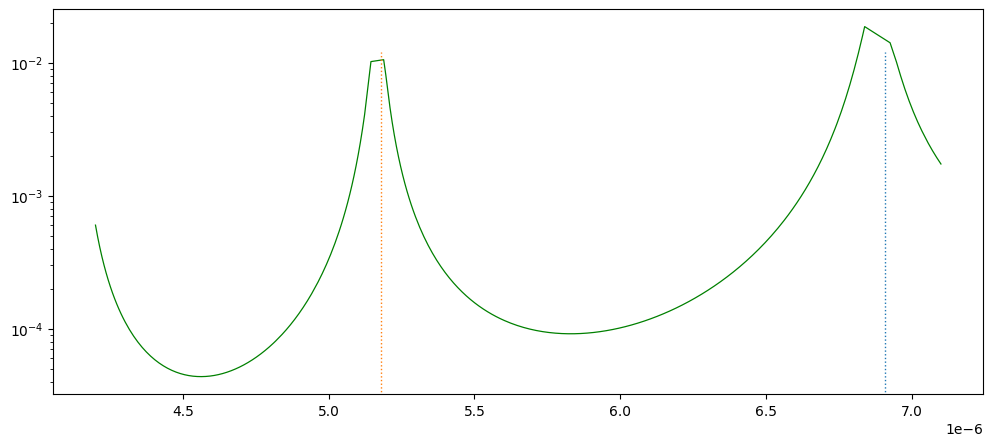

In [56]:
%matplotlib inline
plt.figure(figsize=(12,5))
msk = ~np.isnan(betas1)
plt.plot(wls[msk], -betas1[msk].imag, color='green', linewidth=.9)
plt.yscale('log')
for l in Ls:
    plt.plot([l,l], [0, .012],  linewidth=1, linestyle=':')

In [65]:
np.argmin(-betas1[np.where((wls>5.5e-6)*(wls<6.5e-6))].imag)

45

In [68]:
wls[np.where((wls>5.5e-6)*(wls<6.5e-6))][45]  # Min loss

5.828070175438596e-06